In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 9131.861753917861, RMSE: 95.56077518478939


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.2448
Iteration  200 | Loss = 61.4161
Iteration  300 | Loss = 61.1964
Iteration  400 | Loss = 61.1290
Iteration  500 | Loss = 61.1080
Iteration  600 | Loss = 61.1014
Iteration  700 | Loss = 61.0993
Iteration  800 | Loss = 61.0987
Iteration  900 | Loss = 61.0985
Iteration 1000 | Loss = 61.0984
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3116.465911078567, RMSE: 55.82531604100927
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.0061
Iteration  200 | Loss = 58.3636
Iteration  300 | Loss = 57.4125
Iteration  400 | Loss = 57.0328
Iteration  500 | Loss = 56.8510
Iteration  600 | Loss = 56.7578
Iteration  700 | Loss = 56.7086
Iteration  800 | Loss = 56.6821
Iteration  900 | Loss = 56.6677
Iteration 1000 | Loss = 56.6599
Fitting 

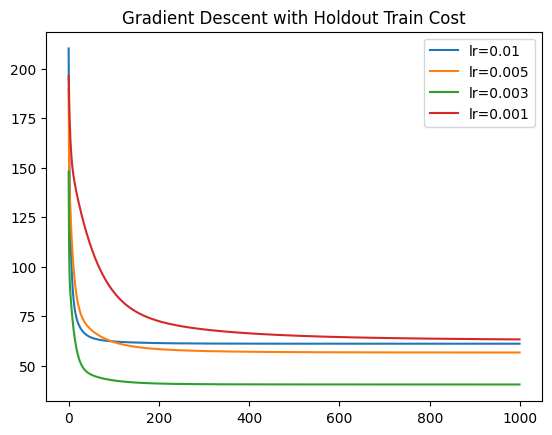

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 53.411309811445534, 'lr': 0.001, 'w': array([-50.43041915,  56.66066433, 357.07668767, 433.53024559,
       192.09323293,  57.07346518, 164.33029973])}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 64.0920
Iteration  200 | Loss = 63.8353
Iteration  300 | Loss = 63.8068
Iteration  400 | Loss = 63.8013
Iteration  500 | Loss = 63.7999
Iteration  600 | Loss = 63.7994
Iteration  700 | Loss = 63.7993
Iteration  800 | Loss = 63.7992
Iteration  900 | Loss = 63.7992
Iteration 1000 | Loss = 63.7992
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2972.551403218763, RMSE: 54.52110970274507
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 55.5672
Iteration  200 | Loss = 53.7966
Iteration  300 | Loss = 53.1678
Iteration  400 | Loss = 52.8282
Iteration  500 | Loss = 52.6314
Iteration  600 | Loss = 52.5149
Iteration  700 | Loss = 52.4455
Iteration  800 | Loss = 52.4042
Iteration  900 | Loss = 52.3795
Iteration 1000 | Loss = 52.364

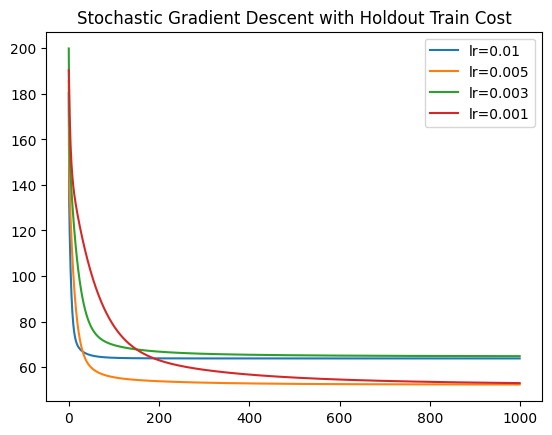

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 43.79945188589512, 'lr': 0.003, 'w': array([-52.30347033,  80.9333216 , 442.23938207, 373.11031141,
       187.39326635,  18.13724653, 216.12870509])}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 49.5527
Iteration  200 | Loss = 49.2871
Iteration  300 | Loss = 49.2482
Iteration  400 | Loss = 49.2370
Iteration  500 | Loss = 49.2336
Iteration  600 | Loss = 49.2325
Iteration  700 | Loss = 49.2322
Iteration  800 | Loss = 49.2321
Iteration  900 | Loss = 49.2321
Iteration 1000 | Loss = 49.2321
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 7835.152933446566, RMSE: 88.51639923452922
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.3652
Iteration  200 | Loss = 61.0764
Iteration  300 | Loss = 61.0482
Iteration  400 | Loss = 61.0447
Iteration  500 | Loss = 61.0442
Iteration  600 | Loss = 61.0441
Iteration  700 | Loss = 61.0441
Iteration  800 | Loss = 61.0441
Iteration  900 | Loss = 61.0441
Iteration 1000 | Loss = 61.0441
Fitti

In [15]:
print(gd_montc_opt_model)

{'rmse': 64.80497262889943, 'lr': 0.003, 'w': array([-55.18546907,  66.72451552, 190.86012871, 427.39843722,
       119.09188808, -78.25542692, 311.40024297])}


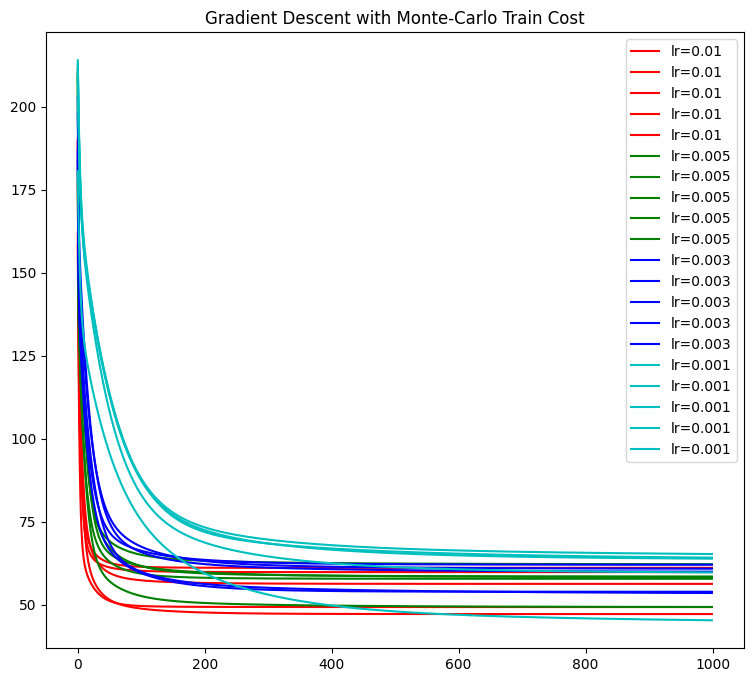

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.5169
Iteration  200 | Loss = 61.5663
Iteration  300 | Loss = 61.3225
Iteration  400 | Loss = 61.2403
Iteration  500 | Loss = 61.2119
Iteration  600 | Loss = 61.2020
Iteration  700 | Loss = 61.1985
Iteration  800 | Loss = 61.1972
Iteration  900 | Loss = 61.1968
Iteration 1000 | Loss = 61.1966
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3267.60505213441, RMSE: 57.16296923826132
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.4599
Iteration  200 | Loss = 64.7590
Iteration  300 | Loss = 64.5912
Iteration  400 | Loss = 64.5431
Iteration  500 | Loss = 64.5303
Iteration  600 | Loss = 64.5276
Iteration  700 | Loss = 64.5276
Iteration  800 | Loss = 64.5280
Iteration  900 | Loss = 64.5285
Iteration 1000 | Loss = 64.5

In [18]:
print(sgd_montc_opt_model)

{'rmse': 62.24067329758698, 'lr': 0.005, 'w': array([-55.72797637,  73.95482075, 424.76876244, 422.94513868,
       203.82006484,  14.37253372, 222.24332905])}


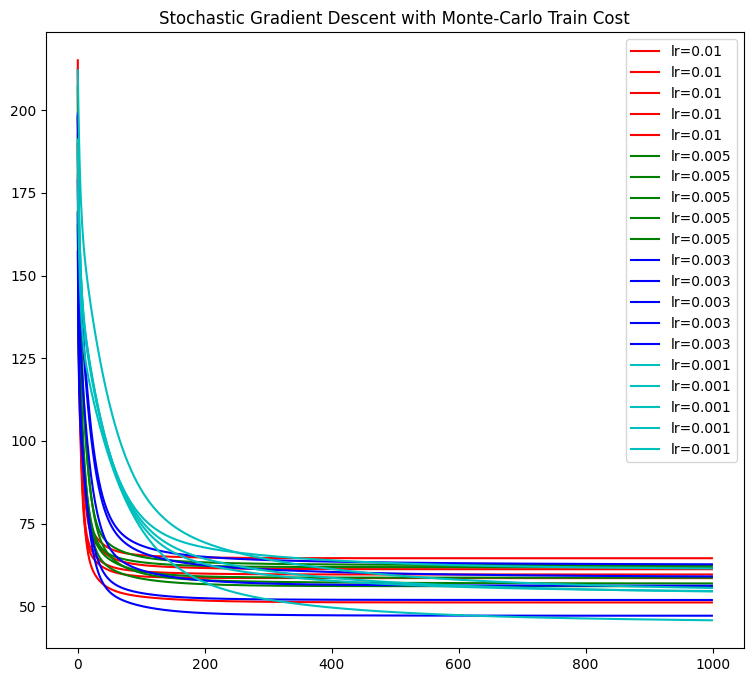

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 52.6505
Iteration  200 | Loss = 51.7436
Iteration  300 | Loss = 51.4931
Iteration  400 | Loss = 51.4207
Iteration  500 | Loss = 51.3998
Iteration  600 | Loss = 51.3937
Iteration  700 | Loss = 51.3919
Iteration  800 | Loss = 51.3914
Iteration  900 | Loss = 51.3913
Iteration 1000 | Loss = 51.3912
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 8791.566013672878, RMSE: [93.7633511222422]
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.8028
Iteration  200 | Loss = 61.2262
Iteration  300 | Loss = 61.0615
Iteration  400 | Loss = 61.0076
Iteration  500 | Loss = 60.9897
Iteration  600 | Loss = 60.9838
Iteration  700 | Loss = 60.9818
Iteration  800 | Loss = 60.9812
Iteration  900 | Loss = 60.9809
Iteration 1000 | Loss = 60.9809
Fitting c

In [21]:
print(gd_kfold_opt_model)

{'rmse': 62.02866741457321, 'lr': 0.005, 'w': array([-60.12222358,  87.51026358, 448.26705495, 386.29265193,
       148.40564778, -10.77323021, 311.71788523])}


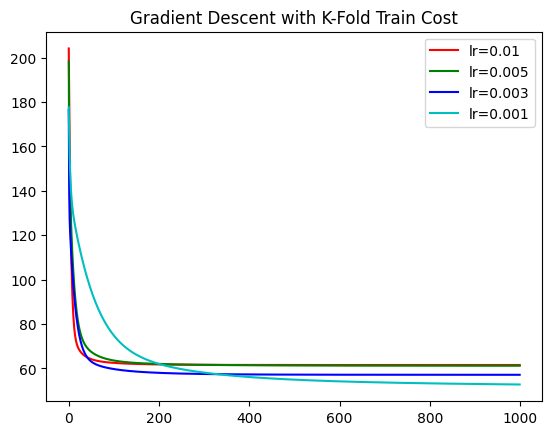

In [22]:
fig = plt.figure()
for i in range(len(gd_kfold_train_costs)):
    plt.plot(gd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.0941
Iteration  200 | Loss = 62.4496
Iteration  300 | Loss = 62.2949
Iteration  400 | Loss = 62.2544
Iteration  500 | Loss = 62.2445
Iteration  600 | Loss = 62.2427
Iteration  700 | Loss = 62.2427
Iteration  800 | Loss = 62.2429
Iteration  900 | Loss = 62.2432
Iteration 1000 | Loss = 62.2433
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1486.0870403714023, RMSE: [38.549799485488926]
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 45.6001
Iteration  200 | Loss = 44.6528
Iteration  300 | Loss = 44.4043
Iteration  400 | Loss = 44.3379
Iteration  500 | Loss = 44.3210
Iteration  600 | Loss = 44.3173
Iteration  700 | Loss = 44.3170
Iteration  800 | Loss = 44.3172
Iteration  900 | Loss = 44.3175
Iteration 1000 | Loss = 44.3

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 63.72209011815678, 'lr': 0.001, 'w': array([-61.26867879,  78.86913713, 342.89853972, 445.11442819,
       139.71725659,  85.16990141, 228.07218448])}


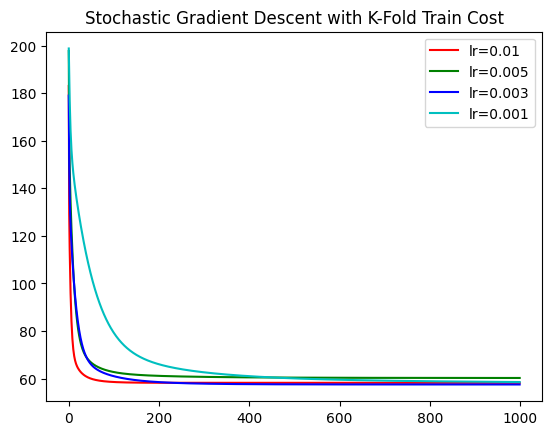

In [25]:
fig = plt.figure()
for i in range(len(sgd_kfold_train_costs)):
    plt.plot(sgd_kfold_train_costs[i], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')